In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv("CocaCola_sales.csv",header=0, index_col=0)
data.head(10)

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [5]:
data.shape

(42, 1)

In [6]:
data.Sales.value_counts().head()

1734.827000    1
3373.000000    1
2879.000999    1
2772.000000    1
3550.000000    1
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Sales'>

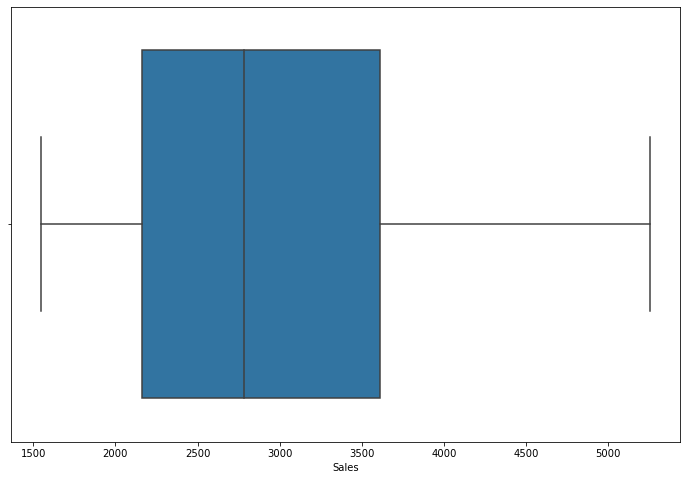

In [7]:
fig=plt.figure(figsize=(12,8))
sns.boxplot("Sales",data=data)

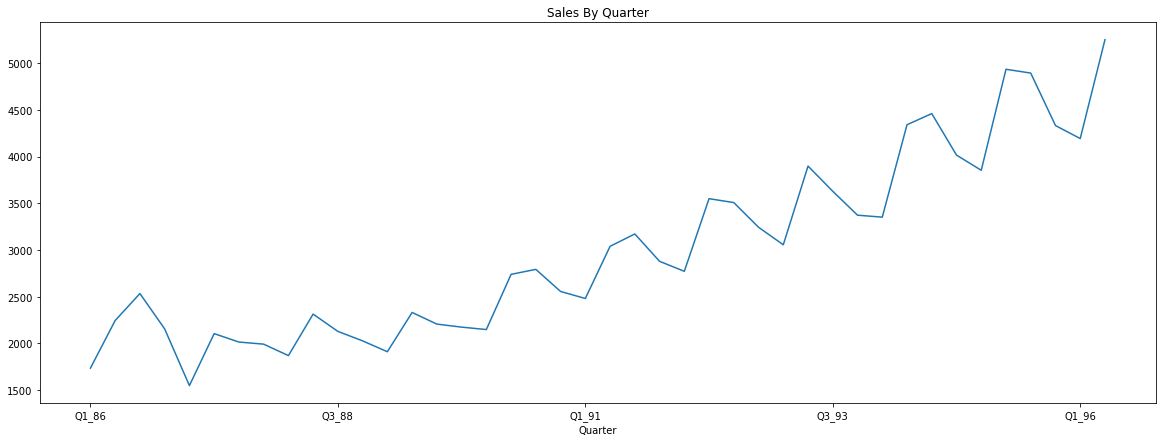

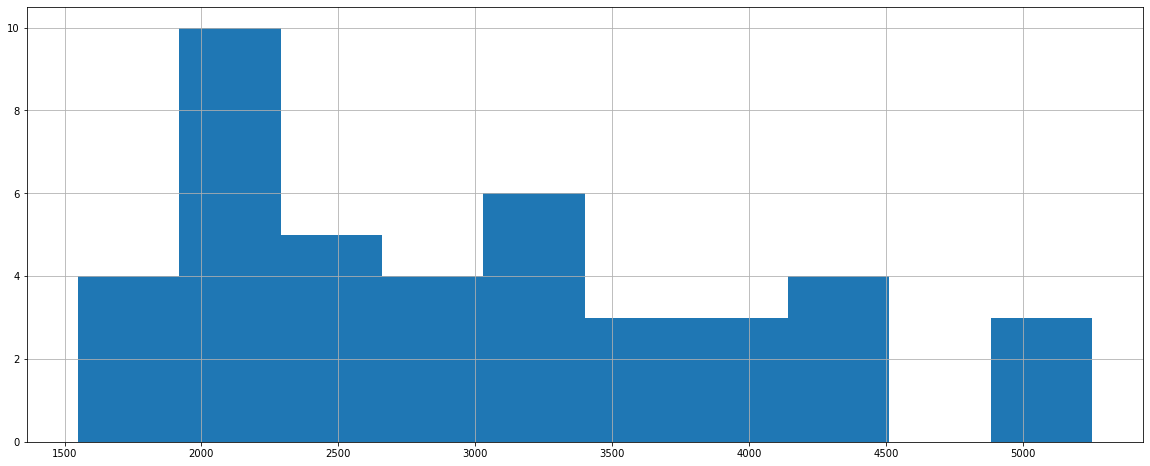

In [8]:
#Line Chart
fig=plt.figure(figsize=(20,7))
plt.title('Sales By Quarter')
data.Sales.plot()
#Histogram
plt.figure(figsize=(20,8))
data.Sales.hist()
plt.show()

# `Transformation`

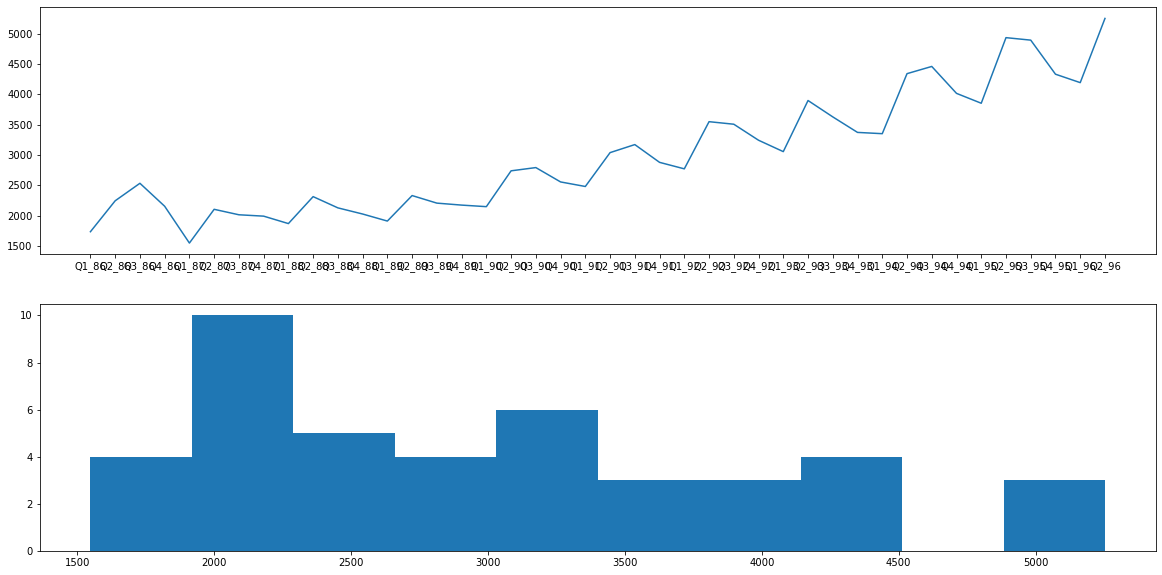

In [9]:
# line chart
fig=plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(data)
#Histogram
plt.subplot(212)
plt.hist(data)
plt.show()

# `Square Root Transform`

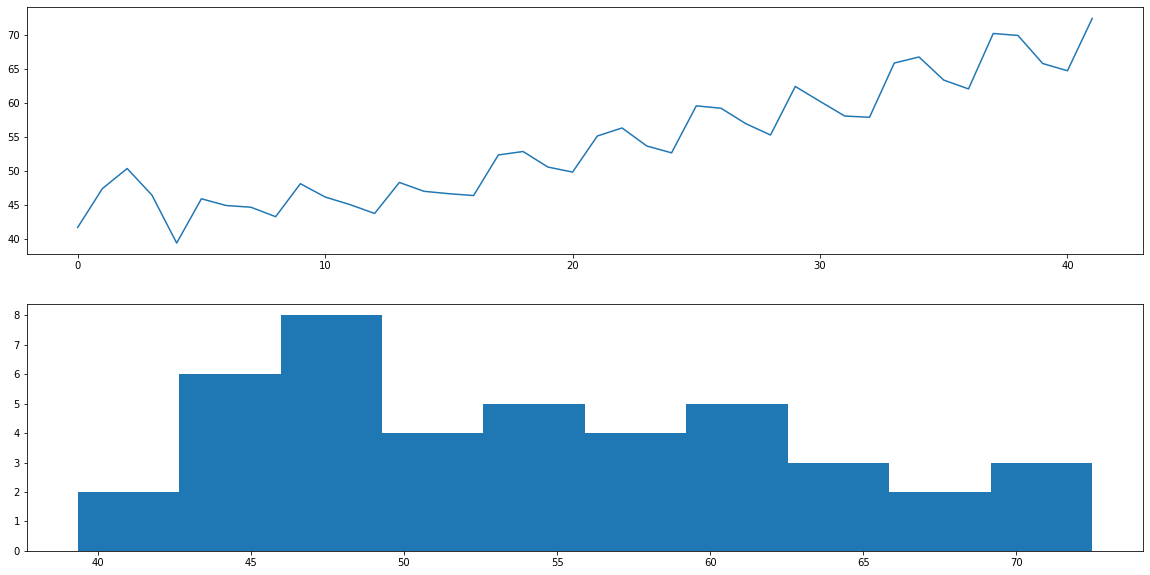

In [10]:
from pandas import DataFrame as df
from numpy import sqrt
df = df(data.values)
df.columns = ['Sales']
df['Sales'] = sqrt(df['Sales'])

# line chart
fig=plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(df['Sales'])
#Histogram
plt.subplot(212)
plt.hist(df['Sales'])
plt.show()

# `Log Transform`

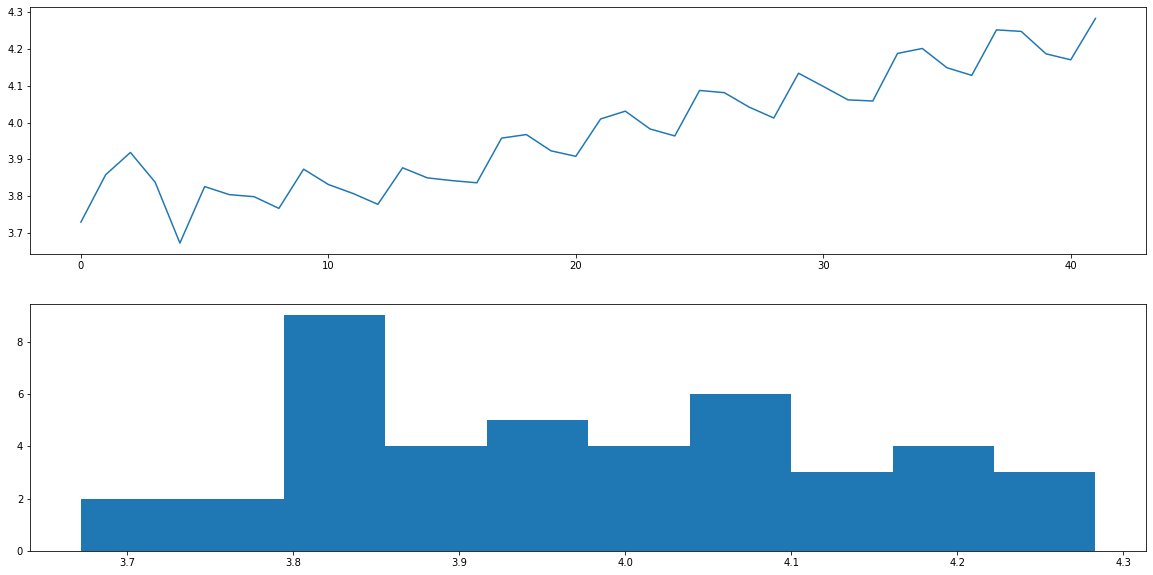

In [11]:
from pandas import DataFrame as df
from numpy import log
df = df(data.values)
df.columns = ['Sales']
df['Sales'] = log(df['Sales'])

# line chart
fig=plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(df['Sales'])
#Histogram
plt.subplot(212)
plt.hist(df['Sales'])
plt.show()

## `Separate array into input and output components`

In [12]:
from sklearn.preprocessing import MinMaxScaler

data_1=pd.read_csv("CocaCola_sales.csv",header=0, index_col=0)
arr=data_1.values

X = arr[:,0]   
Y = arr[:,0:1].reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(Y)

# summarize transformed data
from numpy import set_printoptions
set_printoptions(precision=2)

# `Data Standardization`

In [13]:
from sklearn.preprocessing import StandardScaler

#(0 mean, 1 stdev)
scaler = StandardScaler().fit(Y)
rescaledX = scaler.transform(Y)
# summarize transformed data
set_printoptions(precision=3)

In [14]:
data2=pd.read_csv("CocaCola_Sales.csv")
data2.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [15]:
Quarter=['Q1','Q2','Q3','Q4']
n=data2['Quarter'][0]
n[0:2] 
data2['quarter']=0 # Adding a new column in the data and assigning all values with 0
data2.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0


## `Extracting the Quarters and putting in "quarter" column`

In [16]:
for i in range(42):
    n=data2['Quarter'][i]
    data2['quarter'][i]=n[0:2]  
data2.head()    

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


## `Creating a dataframe of dummy variables of "quarter"`

In [17]:
dummy_data=pd.DataFrame(pd.get_dummies(data2['quarter']))
dummy_data.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


## `Concating the data and dummy Data together and putting in object `

In [18]:
data=pd.concat((data2,dummy_data),axis=1)
t= np.arange(1,43)
data['t']=t #Making a new column "t" and arranging numbers equal to length of data frame
data.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,1,0,0,0,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2
2,Q3_86,2533.804993,Q3,0,0,1,0,3
3,Q4_86,2154.962997,Q4,0,0,0,1,4
4,Q1_87,1547.818996,Q1,1,0,0,0,5


## `Creating T_Square column`

In [19]:
data['t_square']=data['t']*data['t']
data.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


## `log() function`

In [20]:
data["log_Sales"] = np.log(data["Sales"])
data.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


## `Splitting data in Train & Test`

<AxesSubplot:>

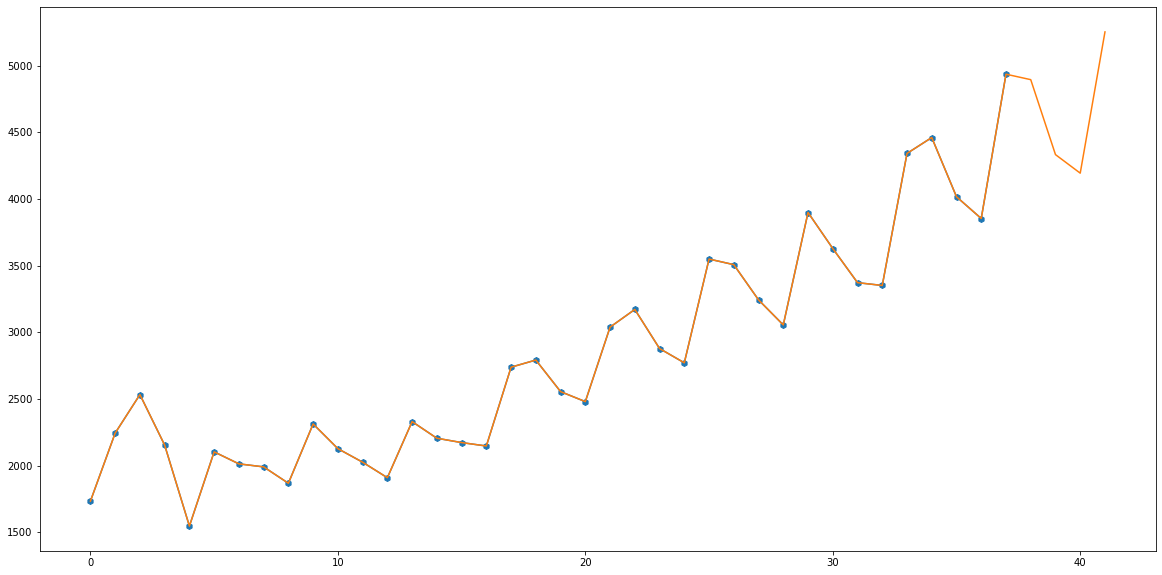

In [21]:
fig=plt.figure(figsize=(20,10))
train= data.head(38)
test=data.tail(4)
plt.plot(train['Sales'],label='Actual',marker = "h")
data.Sales.plot()

### `Linear Model`

In [22]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.553295722396

### `Exponential`

In [23]:
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

466.2479731067151

### `Quadratic`

In [24]:
Quad = smf.ols('Sales~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.561835183163

### `Additive seasonality`

In [25]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547283

### `Additive seasonality with linear`

In [26]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

464.9829023982252

### `Additive Seasonality Quadratic`

In [27]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719348566

### `Multiplicative Additive Seasonality `

In [28]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439049828152

### `Multiplicative seasonality`

In [29]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1963.3896400779745

In [30]:
data3 = {"MODEL":pd.Series(["Linear_Model","Exponential","Quadratic","Additive_seasonality","Add_Sea_with_Linear",
                           "Additive_Sea_Quad","Mult_Add_Sea","Multiplicative_Seasonality"]),"RMSE_Values":
                            pd.Series([rmse_linear,rmseexpo,rmse_Quad,rmse_add_sea,rmseaddlinear,
                            rmse_add_sea_quad,rmse_Mult_add_sea,rmsemul])}
table_rmse=pd.DataFrame(data3)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,Mult_Add_Sea,225.524390
5,Additive_Sea_Quad,301.738007
4,Add_Sea_with_Linear,464.982902
1,Exponential,466.247973
2,Quadratic,475.561835
0,Linear_Model,591.553296
3,Additive_seasonality,1860.023815
7,Multiplicative_Seasonality,1963.389640


## `Moving average for the time series`

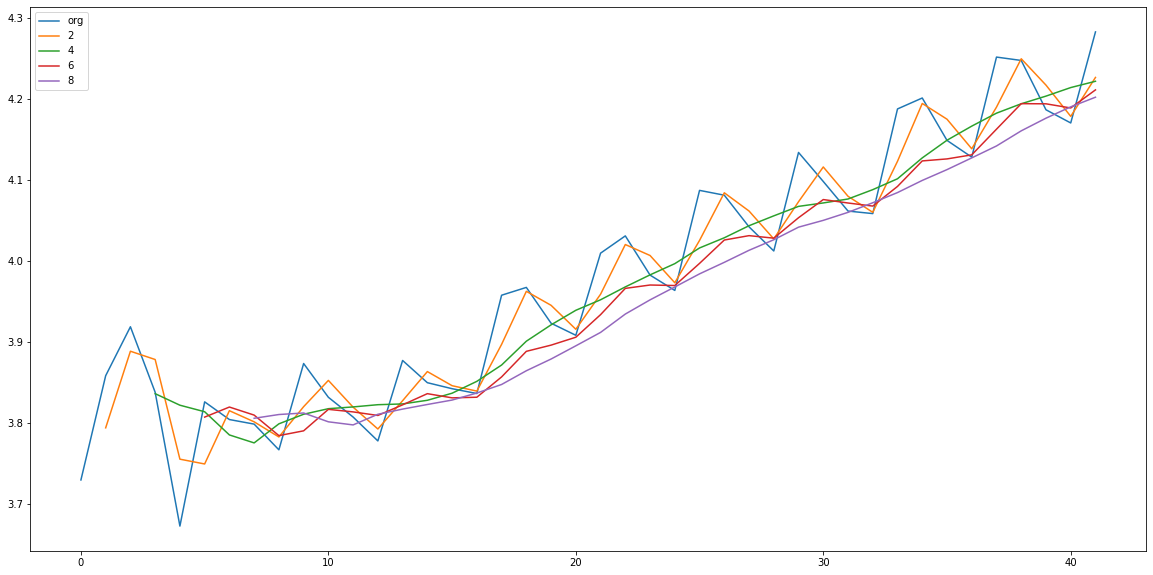

In [31]:
fig=plt.figure(figsize=(20,10))
df.Sales.plot(label="org")
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=2)

## `Final model with least rmse value`

In [32]:
df = data.head(42)
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=df).fit()
pred_new  = pd.Series(Mul_Add_sea.predict(df))

## `Forecast for Sales`

In [33]:
df["forecasted_Sales"] = pd.DataFrame(pred_new)
df

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,7.345823
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,7.587884
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,7.574280
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,7.498859
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,7.440236
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,7.682297
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,7.668693
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,7.593272
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,7.534649
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,7.776710
